# SW 10 Mitschrift

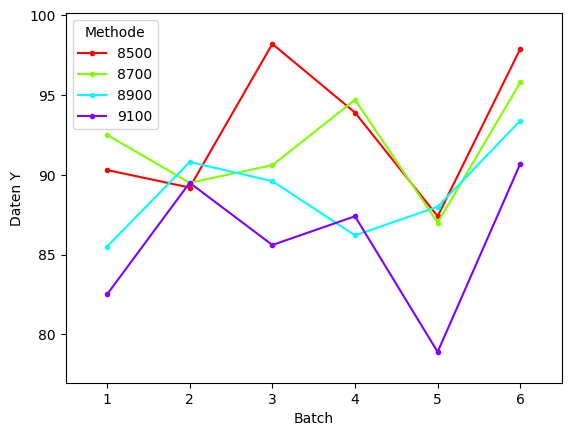

In [3]:
from pandas import DataFrame 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

import matplotlib.pyplot as plt

Daten = DataFrame({
    "Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
    "Methode": np.repeat(["8500", "8700", "8900", "9100"], 6),
    "Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 
                    89.5, 90.6, 94.7, 87, 95.8, 85.5, 90.8, 
                    89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 
                    87.4, 78.9, 90.7])
    })

interaction_plot(x=Daten["Batch"], trace=Daten["Methode"], 
response=Daten["Y"])

plt.ylabel("Daten Y") 
plt.show()

In [4]:
# Ordinary least squares
 
from patsy.contrasts import Sum
fit = ols("Y ~ C(Methode, Sum)+C(Batch,Sum)", data=Daten).fit()

fit.params

Intercept                  89.795833
C(Methode, Sum)[S.8500]     3.020833
C(Methode, Sum)[S.8700]     1.887500
C(Methode, Sum)[S.8900]    -0.879167
C(Batch, Sum)[S.1]         -2.095833
C(Batch, Sum)[S.2]         -0.045833
C(Batch, Sum)[S.3]          1.204167
C(Batch, Sum)[S.4]          0.754167
C(Batch, Sum)[S.5]         -4.470833
dtype: float64

In [5]:
fit = ols("Y ~ C(Methode, Sum)+C(Batch, Sum)", data=Daten).fit()

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,8.107077,0.001916
"C(Batch, Sum)",5.0,192.252083,38.450417,5.248666,0.005532
Residual,15.0,109.886250,7.325750,NaN,NaN


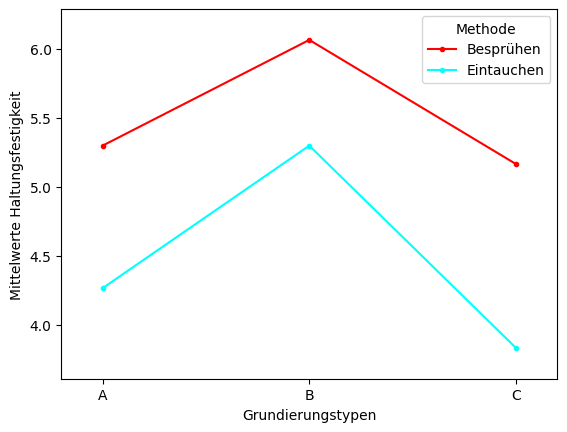

In [6]:
Farbe = DataFrame({
"Grund": np.repeat(["A", "B", "C"], 6),
"Methode": np.tile(np.repeat(["Eintauchen", "Besprühen"], 3), 3), 
"Y": np.array([4, 4.5, 4.3, 5.4, 4.9, 5.6, 5.6, 4.9, 5.4, 5.8, 6.1, 
6.3, 3.8, 3.7, 4, 5.5, 5, 5])
})

interaction_plot(x=Farbe["Grund"], trace=Farbe["Methode"], 
response=Farbe["Y"])

plt.xlabel("Grundierungstypen") 
plt.ylabel("Mittelwerte Haltungsfestigkeit")

plt.show()